In [1]:
from xcube.core.store.dataaccess import get_data_accessor_infos, get_data_accessor_class
from IPython.display import JSON

Which data accessors are available?

In [2]:
JSON(get_data_accessor_infos())

d:\projects\xcube\xcube\util\plugin.py:166: UserWarning: module 'xcube_core_store' looks like an xcube-plugin but lacks a callable named 'init_plugin'
  warnings.warn(f'module {module_name!r} looks like an xcube-plugin '


<IPython.core.display.JSON object>

Get a specific store

In [3]:
data_accessor_class = get_data_accessor_class('sentinelhub')
data_accessor_class

xcube_sh.dataaccess.SentinelHubDataAccessor

Usually we need more information to turn the store class into a data service. Which service parameters are available?

In [4]:
data_accessor_class.get_data_accessor_params_schema()

Just provide mandatory parameters to instantiate the store class:

In [5]:
data_accessor = data_accessor_class()

Which datasets are provided? (the list may contain both gridded and vector datasets):

In [6]:
list(data_accessor.iter_dataset_ids())

['S1GRD', 'S2L1C', 'S2L2A', 'S3OCLI', 'S3SLSTR', 'L8L1C']

Get more info about a dedicated dataset. This include a description of the possible open formats:

In [7]:
data_accessor.describe_dataset('S2L2A')

Which parameters must I pass or are available to open the dataset?

In [8]:
data_accessor.get_open_dataset_params_schema('S2L2A')

There are 3 required parameters, so we need to provide them to open a dataset:

In [9]:
dataset = data_accessor.open_dataset('S2L2A', band_names=['B01', 'B05', 'B08'], geometry=[11, 52, 14, 55], spatial_res=0.005, time_range=['2019-05-01', '2019-05-10'], time_period='1d')
dataset

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 600, lon: 600, time: 10)
Coordinates:
  * lat        (lat) float64 55.0 54.99 54.99 54.98 ... 52.02 52.01 52.01 52.0
  * lon        (lon) float64 11.0 11.01 11.01 11.02 ... 13.98 13.99 13.99 14.0
  * time       (time) datetime64[ns] 2019-05-01T12:00:00 ... 2019-05-10T12:00:00
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(10, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    B01        (time, lat, lon) float32 dask.array<chunksize=(1, 600, 600), meta=np.ndarray>
    B05        (time, lat, lon) float32 dask.array<chunksize=(1, 600, 600), meta=np.ndarray>
    B08        (time, lat, lon) float32 dask.array<chunksize=(1, 600, 600), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.7
    title:                     S2L2A Data Cube Subset
    history:                   [{'program': 'xcube_sh.store.SentinelHubStore'...
    date_created:              2020-06-10T15:27:50.822370
    processing_level:          L2A
    time_coverage_start:       2019-05-01T00:00:00+00:00
    time_coverage_end:         2019-05-11T00:00:00+00:00
    time_coverage_duration:    P10DT0H0M0S
    time_coverage_resolution:  P1DT0H0M0S
    geospatial_lon_min:        11
    geospatial_lat_min:        52
    geospatial_lon_max:        14.0
    geospatial_lat_max:        55.0

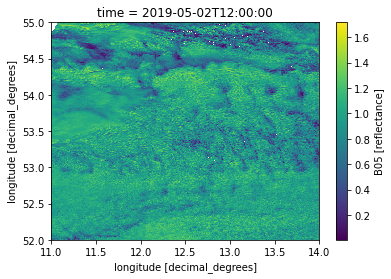

In [10]:
dataset.B05.isel(time=1).plot.imshow()